In [2]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# List of filenames in the current directory
directory = '.'  # Assuming the files are in the same directory as the notebook

# Print available files in the directory (optional)
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        print(f"Found file: {filename}")

# Now load the necessary files into pandas DataFrames
city_attributes = pd.read_csv(os.path.join(directory, 'city_attributes.csv'))
humidity = pd.read_csv(os.path.join(directory, 'humidity.csv'))
pressure = pd.read_csv(os.path.join(directory, 'pressure.csv'))
temperature = pd.read_csv(os.path.join(directory, 'temperature.csv'))
wind_speed = pd.read_csv(os.path.join(directory, 'wind_speed.csv'))
wind_direction = pd.read_csv(os.path.join(directory, 'wind_direction.csv'))
weather_description = pd.read_csv(os.path.join(directory, 'weather_description.csv'))

# Display the first few rows of each file to verify successful loading (optional)
print("City Attributes:\n", city_attributes.head())
print("Humidity:\n", humidity.head())
print("Pressure:\n", pressure.head())
print("Temperature:\n", temperature.head())
print("Wind Speed:\n", wind_speed.head())
print("Wind Direction:\n", wind_direction.head())
print("Weather Description:\n", weather_description.head())


Found file: city_attributes.csv
Found file: humidity.csv
Found file: pressure.csv
Found file: temperature.csv
Found file: weather_description.csv
Found file: wind_direction.csv
Found file: wind_speed.csv
City Attributes:
             City        Country   Latitude   Longitude
0      Vancouver         Canada  49.249660 -123.119339
1       Portland  United States  45.523449 -122.676208
2  San Francisco  United States  37.774929 -122.419418
3        Seattle  United States  47.606209 -122.332069
4    Los Angeles  United States  34.052231 -118.243683
Humidity:
               datetime  Vancouver  Portland  San Francisco  Seattle  \
0  2012-10-01 12:00:00        NaN       NaN            NaN      NaN   
1  2012-10-01 13:00:00       76.0      81.0           88.0     81.0   
2  2012-10-01 14:00:00       76.0      80.0           87.0     80.0   
3  2012-10-01 15:00:00       76.0      80.0           86.0     80.0   
4  2012-10-01 16:00:00       77.0      80.0           85.0     79.0   

   Los Ang

In [4]:
sample='2013-01-01 2013-01-01 24 34 34 34 35 35 35 35 36 36 36 37 36 36 35 34 33 32 31 30 29 26 25 23 22 1'
sample

'2013-01-01 2013-01-01 24 34 34 34 35 35 35 35 36 36 36 37 36 36 35 34 33 32 31 30 29 26 25 23 22 1'

In [6]:
sample=sample.split()
sample

['2013-01-01',
 '2013-01-01',
 '24',
 '34',
 '34',
 '34',
 '35',
 '35',
 '35',
 '35',
 '36',
 '36',
 '36',
 '37',
 '36',
 '36',
 '35',
 '34',
 '33',
 '32',
 '31',
 '30',
 '29',
 '26',
 '25',
 '23',
 '22',
 '1']

In [8]:
startdate=sample[0]
enddate=sample[1]
count=sample[2]
temperature=sample[3:-1]
predict_days=sample[-1]

In [10]:
from datetime import datetime,timedelta
startdatetime=datetime.strptime(startdate,'%Y-%m-%d')
tmp=[]
for i in range(int(count)):
    row=(startdatetime,temperature[i])
    tmp.append(row)
    startdatetime+=timedelta(hours=1)
labels=['datetime','temp']
result=pd.DataFrame.from_records(tmp,columns=labels)
result

,datetime,temp
0,2013-01-01 00:00:00,34
1,2013-01-01 01:00:00,34
2,2013-01-01 02:00:00,34
3,2013-01-01 03:00:00,35
4,2013-01-01 04:00:00,35
5,2013-01-01 05:00:00,35
6,2013-01-01 06:00:00,35
7,2013-01-01 07:00:00,36
8,2013-01-01 08:00:00,36
9,2013-01-01 09:00:00,36


In [14]:
temperature = pd.read_csv('temperature.csv')

print(temperature.head(3))


              datetime   Vancouver    Portland  San Francisco     Seattle  \
0  2012-10-01 12:00:00         NaN         NaN            NaN         NaN   
1  2012-10-01 13:00:00  284.630000  282.080000     289.480000  281.800000   
2  2012-10-01 14:00:00  284.629041  282.083252     289.474993  281.797217   

   Los Angeles   San Diego   Las Vegas     Phoenix  Albuquerque  ...  \
0          NaN         NaN         NaN         NaN          NaN  ...   
1   291.870000  291.530000  293.410000  296.600000   285.120000  ...   
2   291.868186  291.533501  293.403141  296.608509   285.154558  ...   

   Philadelphia    New York   Montreal      Boston  Beersheba  \
0           NaN         NaN        NaN         NaN        NaN   
1    285.630000  288.220000  285.83000  287.170000     307.59   
2    285.663208  288.247676  285.83465  287.186092     307.59   

   Tel Aviv District       Eilat  Haifa  Nahariyya  Jerusalem  
0                NaN  309.100000    NaN        NaN        NaN  
1            

In [18]:
# Extract the 'datetime' and 'Boston' columns from the temperature DataFrame
boston = temperature.loc[:, ['datetime', 'Boston']]

# Display the first 3 rows of the Boston data
print(boston.head(3))


              datetime      Boston
0  2012-10-01 12:00:00         NaN
1  2012-10-01 13:00:00  287.170000
2  2012-10-01 14:00:00  287.186092


In [20]:
print(temperature.columns)


Index(['datetime', 'Vancouver', 'Portland', 'San Francisco', 'Seattle',
       'Los Angeles', 'San Diego', 'Las Vegas', 'Phoenix', 'Albuquerque',
       'Denver', 'San Antonio', 'Dallas', 'Houston', 'Kansas City',
       'Minneapolis', 'Saint Louis', 'Chicago', 'Nashville', 'Indianapolis',
       'Atlanta', 'Detroit', 'Jacksonville', 'Charlotte', 'Miami',
       'Pittsburgh', 'Toronto', 'Philadelphia', 'New York', 'Montreal',
       'Boston', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa',
       'Nahariyya', 'Jerusalem'],
      dtype='object')


In [24]:
from datetime import datetime, timedelta
import pandas as pd

# Assuming 'startdate' is defined, e.g., '2022-01-01'
startdate = '2022-01-01'
# Assuming 'count' is defined, e.g., the number of hours you want to generate records for
count = 24  # Adjust this to your needs

startdatetime = datetime.strptime(startdate, '%Y-%m-%d')
tmp = []

# Iterate over the number of hours specified in 'count'
for i in range(int(count)):
    # Ensure that you are accessing a valid index in the DataFrame, here we use 'Boston' as an example
    # It's critical to make sure 'i' does not exceed the number of rows in your DataFrame
    if i < len(temperature):
        # Access the temperature for 'Boston' at index 'i'
        row_temperature = temperature.at[i, 'Boston']  # Adjust 'Boston' if needed for other cities
        row = (startdatetime, row_temperature)
        tmp.append(row)
        startdatetime += timedelta(hours=1)

# Define the labels for your resulting DataFrame
labels = ['datetime', 'temp']
result = pd.DataFrame.from_records(tmp, columns=labels)
print(result)

# Example usage with 'temp' corrected, accessing 'Boston' data for the first few rows
boston = temperature.loc[:, ['datetime', 'Boston']]
print(boston.head(3))


              datetime        temp
0  2022-01-01 00:00:00         NaN
1  2022-01-01 01:00:00  287.170000
2  2022-01-01 02:00:00  287.186092
3  2022-01-01 03:00:00  287.231672
4  2022-01-01 04:00:00  287.277251
5  2022-01-01 05:00:00  287.322831
6  2022-01-01 06:00:00  287.368410
7  2022-01-01 07:00:00  287.413990
8  2022-01-01 08:00:00  287.459569
9  2022-01-01 09:00:00  287.505149
10 2022-01-01 10:00:00  287.550728
11 2022-01-01 11:00:00  287.596308
12 2022-01-01 12:00:00  287.641887
13 2022-01-01 13:00:00  287.687467
14 2022-01-01 14:00:00  287.733046
15 2022-01-01 15:00:00  287.778626
16 2022-01-01 16:00:00  287.824205
17 2022-01-01 17:00:00  287.869785
18 2022-01-01 18:00:00  287.915364
19 2022-01-01 19:00:00  287.960944
20 2022-01-01 20:00:00  288.006523
21 2022-01-01 21:00:00  288.052103
22 2022-01-01 22:00:00  288.097682
23 2022-01-01 23:00:00  288.143262
              datetime      Boston
0  2012-10-01 12:00:00         NaN
1  2012-10-01 13:00:00  287.170000
2  2012-10-01 14:00:

In [26]:
print(boston.isnull().sum())
boston.fillna(method='bfill',inplace=True)
boston.isnull().sum()

datetime    0
Boston      3
dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_14760\1085721903.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  boston.fillna(method='bfill',inplace=True)


datetime    0
Boston      0
dtype: int64

In [28]:

boston.iloc[:,1]=boston.iloc[:,1].apply(round)-273.15

#select part of data into train test split
bostonsample=boston[boston['datetime']>='2013-01-01 00:00:00']
bostonsample=bostonsample.iloc[0:12*(154+48)]

bostonsample['datetime']=pd.to_datetime(bostonsample['datetime'])
bostonsample.columns=['time','temp']
bostonsample

,time,temp
2196,2013-01-01 00:00:00,-4.15
2197,2013-01-01 01:00:00,-4.15
2198,2013-01-01 02:00:00,-5.15
2199,2013-01-01 03:00:00,-6.15
2200,2013-01-01 04:00:00,-6.15
...,...,...
4615,2013-04-11 19:00:00,16.85
4616,2013-04-11 20:00:00,15.85
4617,2013-04-11 21:00:00,14.85
4618,2013-04-11 22:00:00,12.85


In [30]:
train=bostonsample[0:77*24]
test=bostonsample[77*24:]

In [32]:
!pip install chart_studio


   ---------------------------------------- 0.0/64.4 kB ? eta -:--:--
   ------------ --------------------------- 20.5/64.4 kB 640.0 kB/s eta 0:00:01
   ------------------------- -------------- 41.0/64.4 kB 487.6 kB/s eta 0:00:01
   ---------------------------------------- 64.4/64.4 kB 694.6 kB/s eta 0:00:00


In [34]:
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
#import plotly.plotly as py # visualization library
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.

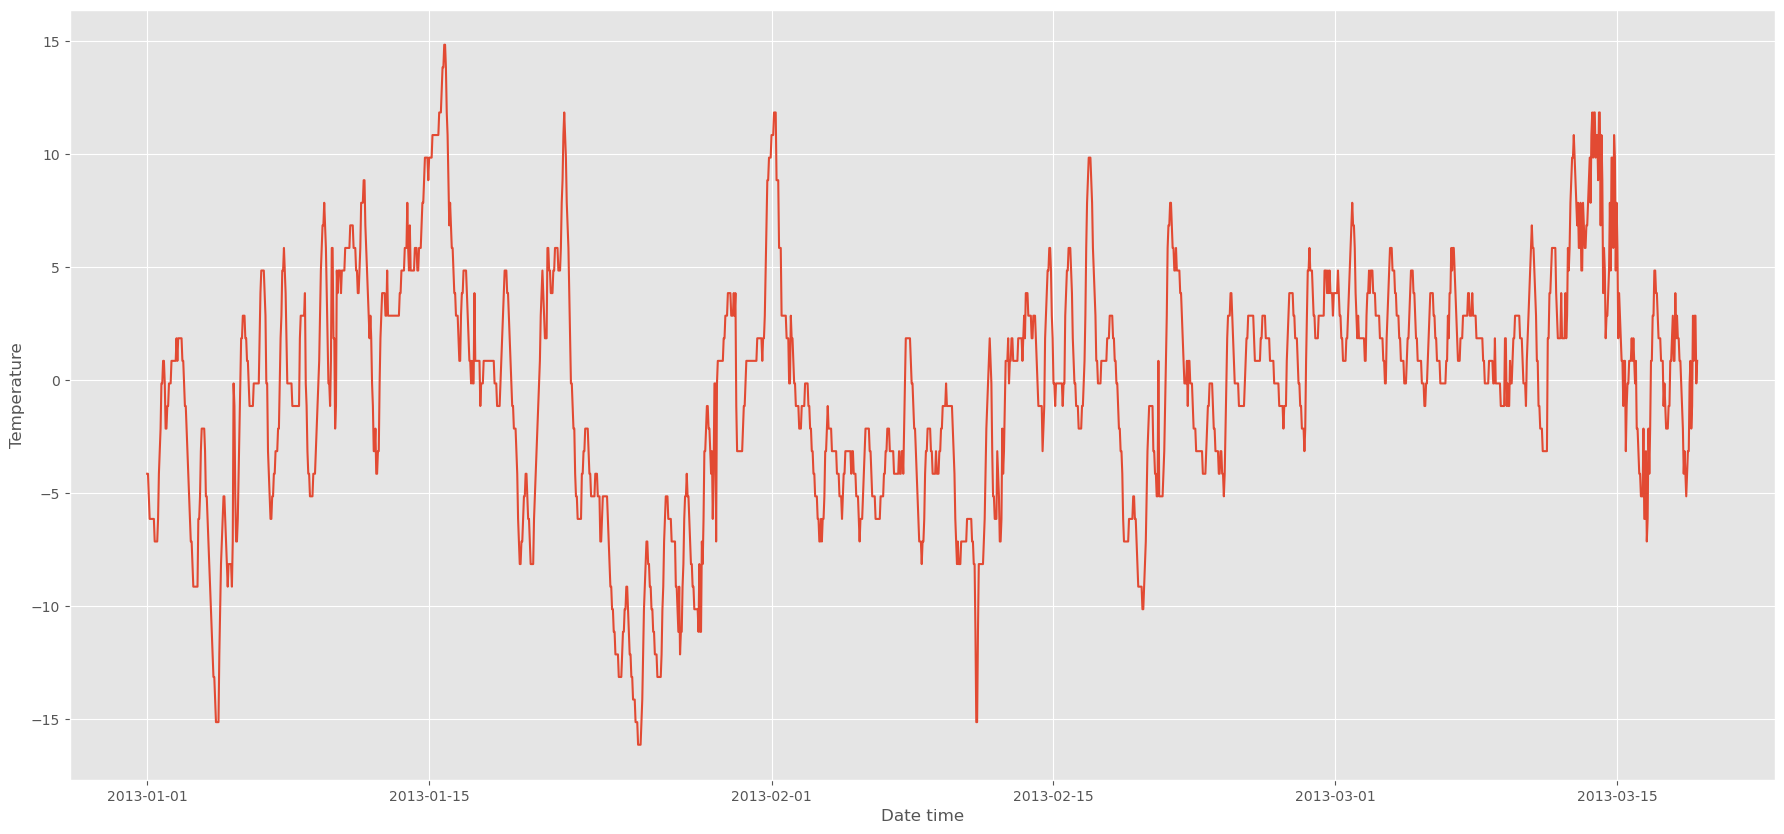

In [36]:
plt.figure(figsize=(22,10))
plt.plot(train.time,train.temp)
#plt.title("Temperature ")
plt.xlabel("Date time")
plt.ylabel("Temperature")
plt.show()

In [38]:
import warnings   
warnings.filterwarnings("ignore")  # if there is a warning after some codes, this will avoid us to see them

In [40]:
ts=train
ts.index=ts.time
ts.drop('time',inplace=True,axis=1)

In [42]:
ts.head()


,temp
time,
2013-01-01 00:00:00,-4.15
2013-01-01 01:00:00,-4.15
2013-01-01 02:00:00,-5.15
2013-01-01 03:00:00,-6.15
2013-01-01 04:00:00,-6.15


In [44]:
ts.rolling(window=6).mean().head(10)
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])

In [46]:
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = ts.rolling(window=6).mean()
    rolstd = ts.rolling(window=6).std()
    plt.figure(figsize=(22,10))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()

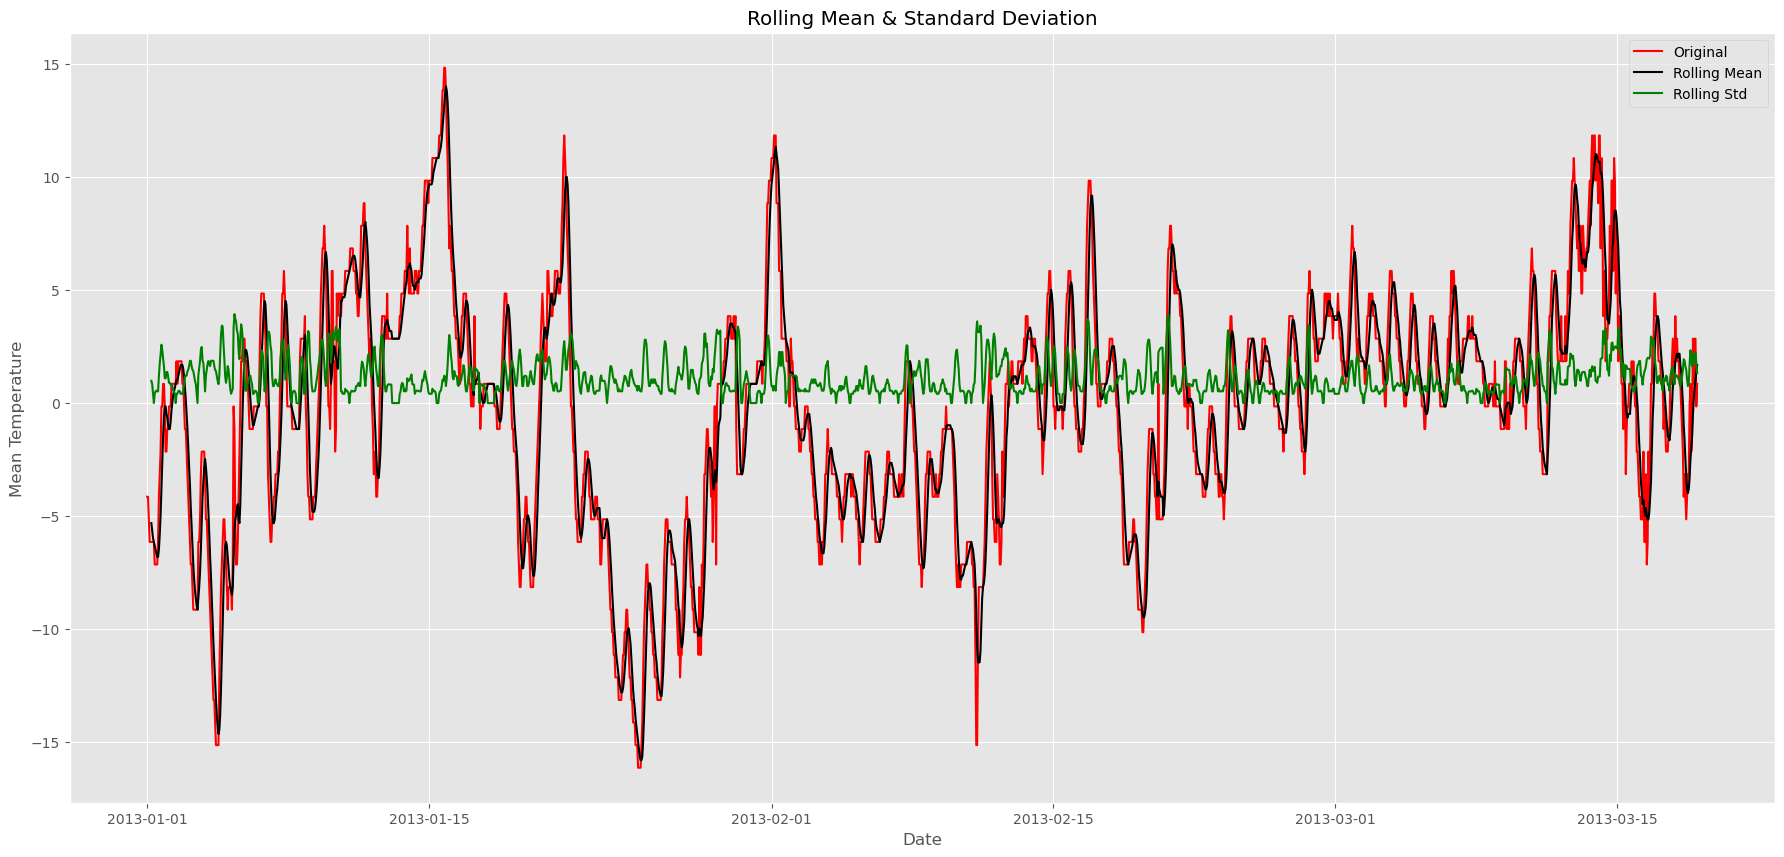

Test statistic:  -4.8057576784407825
p-value:  5.3023299012569625e-05
Critical Values: {'1%': -3.4339441475744668, '5%': -2.8631276157416945, '10%': -2.5676151930364455}


In [48]:
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts.temp)
check_adfuller(ts.temp)

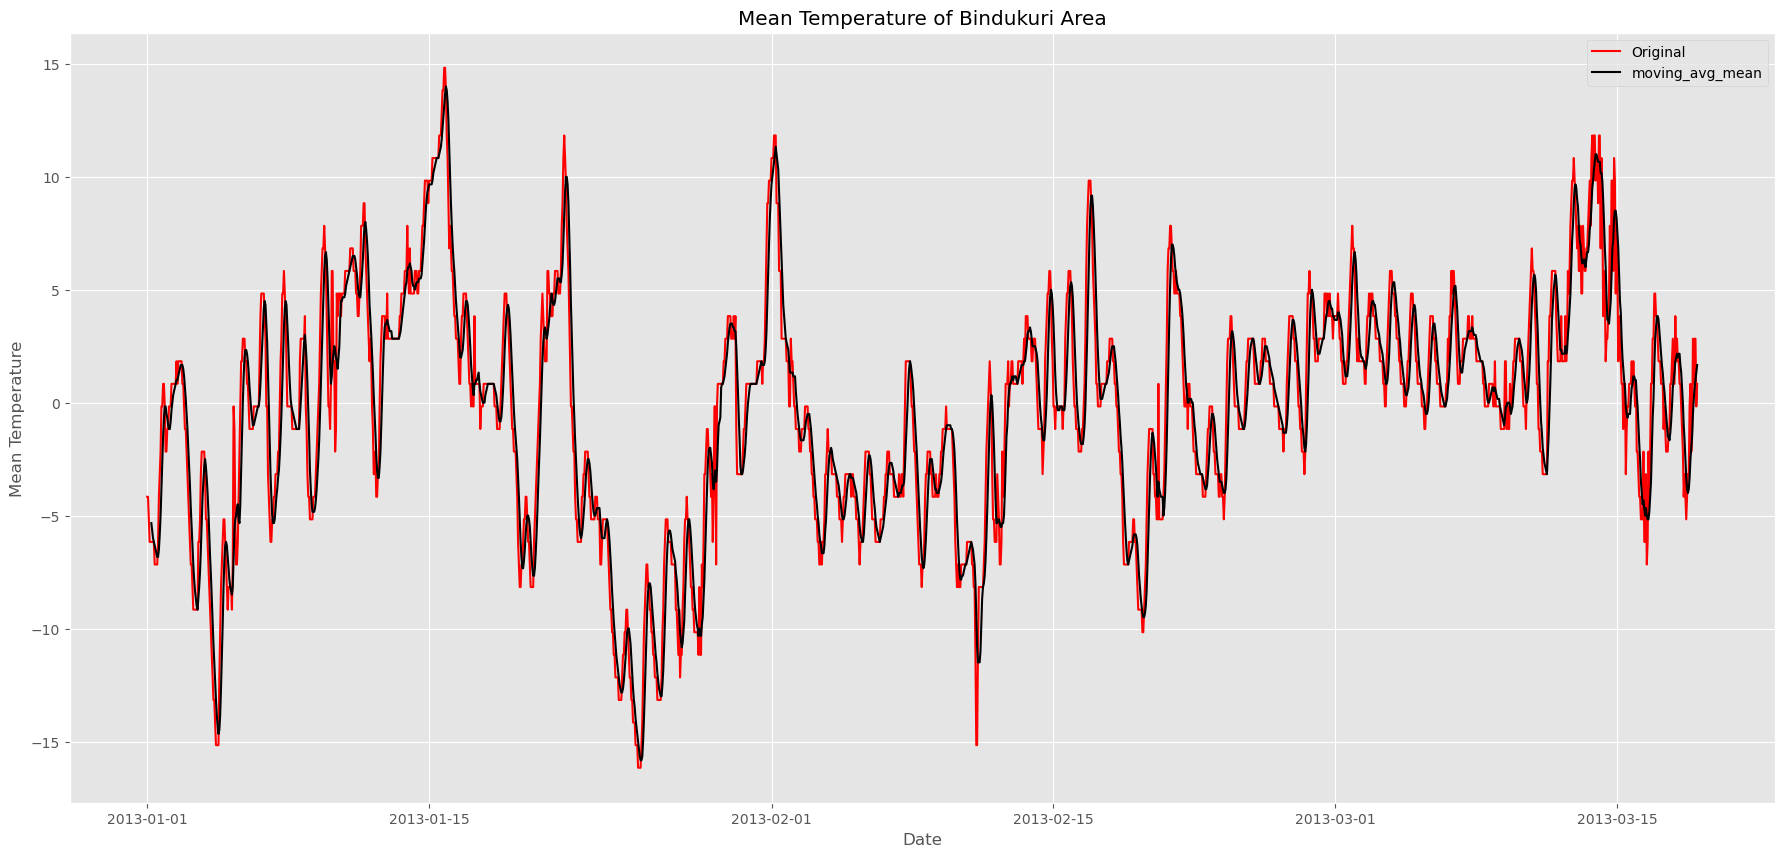

In [50]:
# Moving average method
window_size = 6
moving_avg = ts.rolling(window=window_size).mean()
plt.figure(figsize=(22,10))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

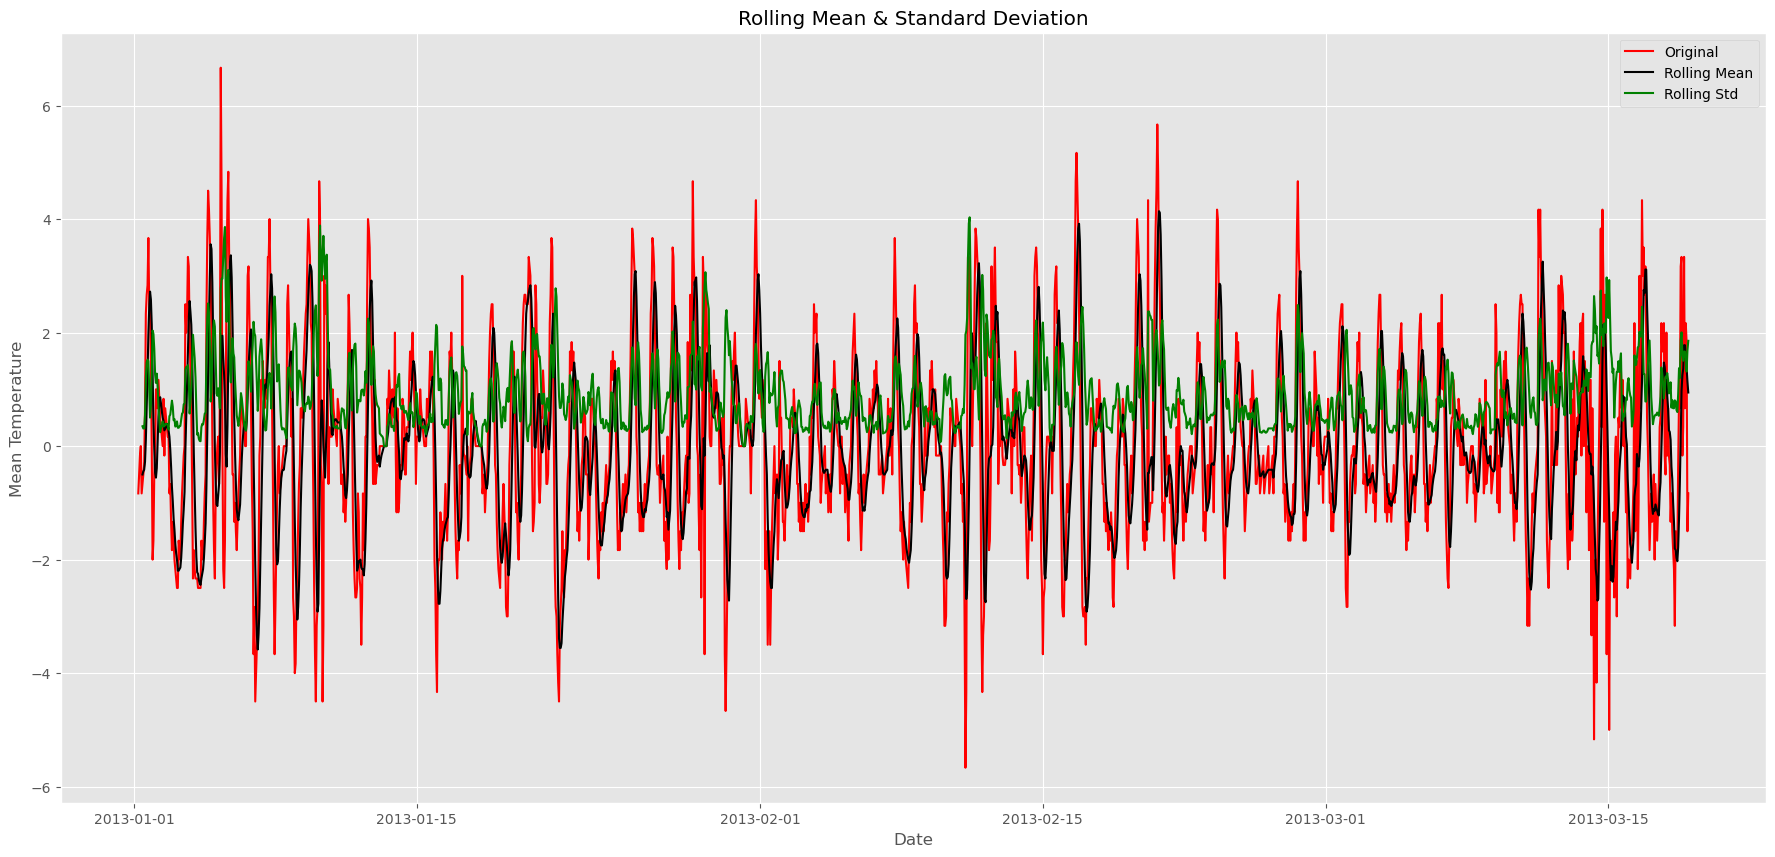

Test statistic:  -7.71731652087288
p-value:  1.2184941953383362e-11
Critical Values: {'1%': -3.4339481027788024, '5%': -2.8631293617920544, '10%': -2.5676161227508754}


In [52]:
ts_moving_avg_diff = ts - moving_avg
ts_moving_avg_diff.dropna(inplace=True) # first 6 is nan value due to window size

# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_moving_avg_diff)
check_adfuller(ts_moving_avg_diff.temp)

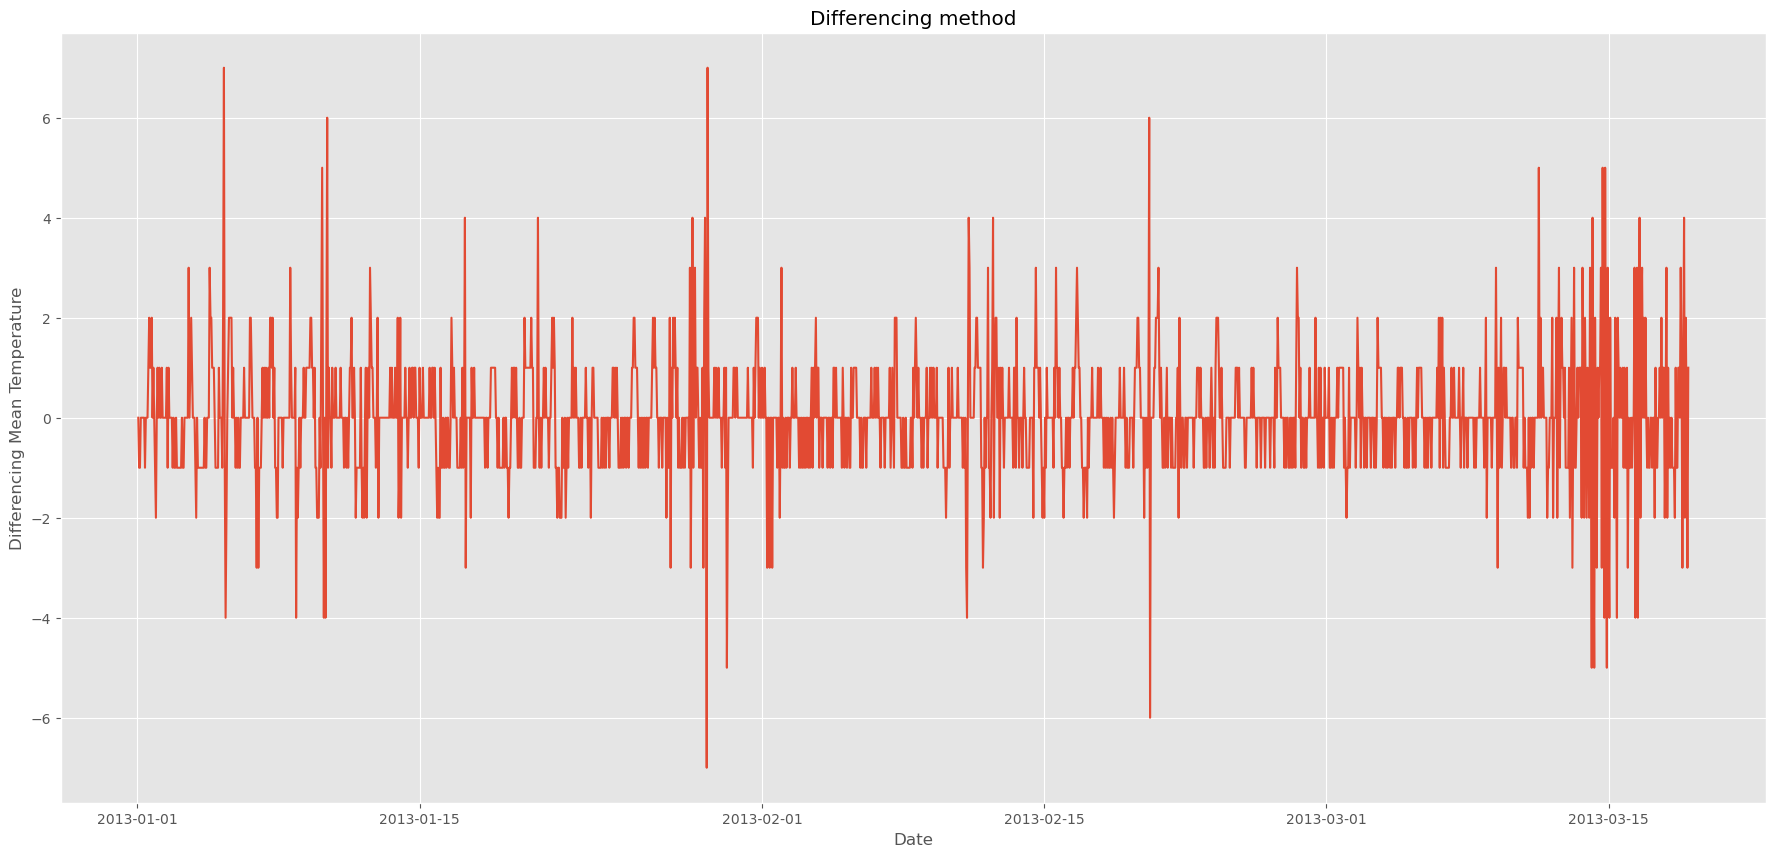

In [54]:
# differencing method
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing method") 
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

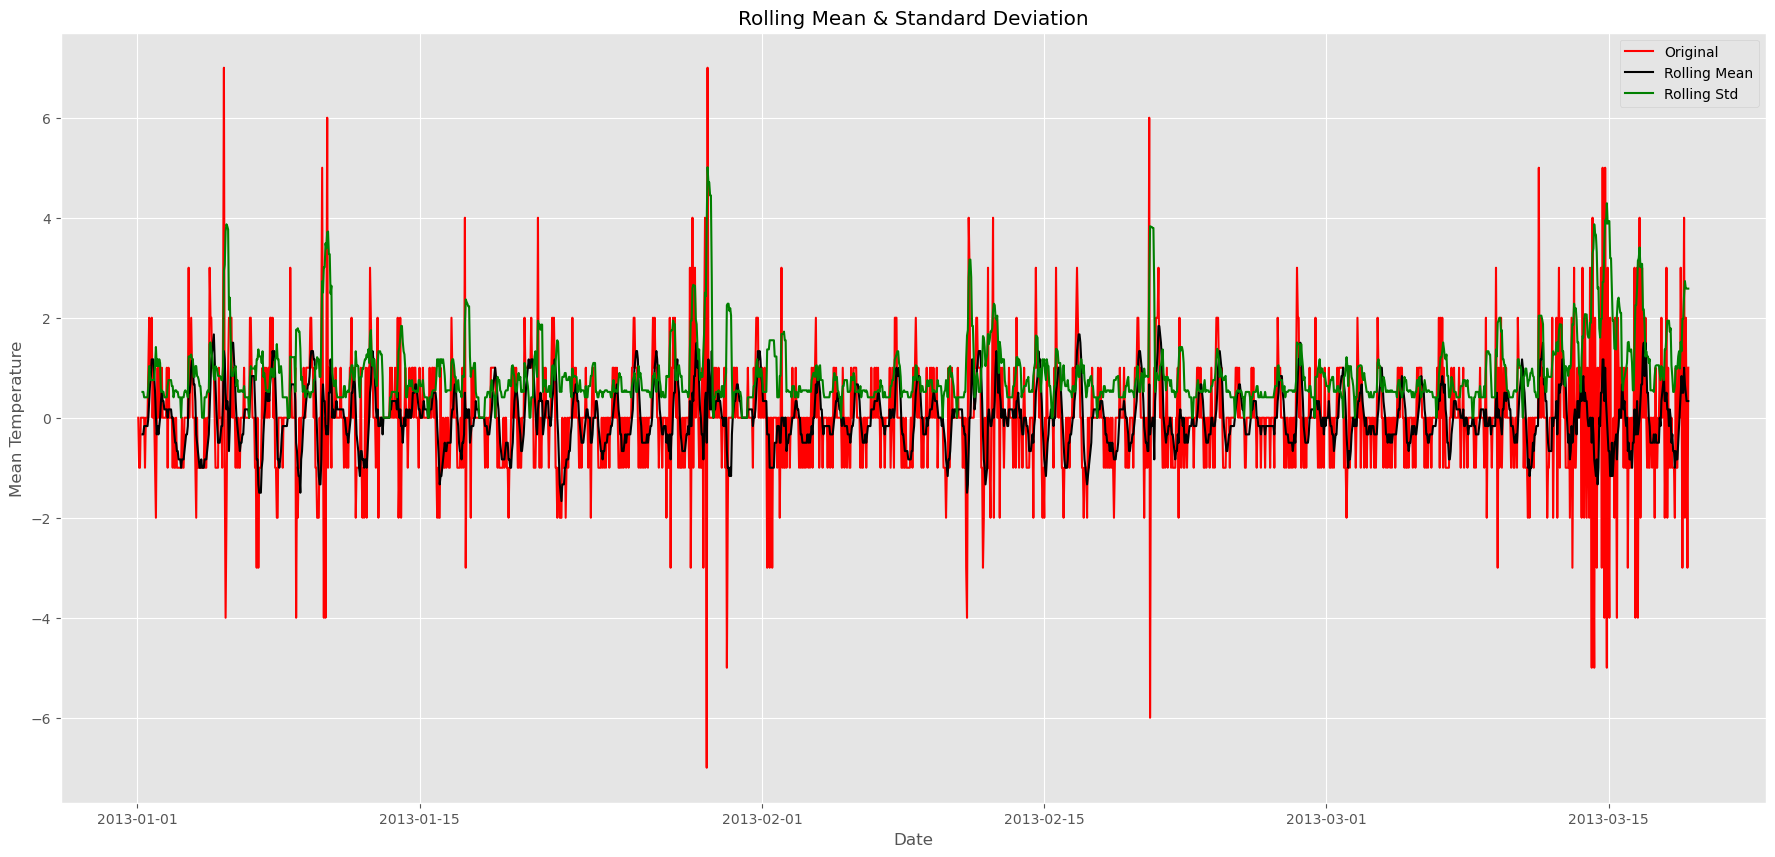

Test statistic:  -8.002673209324794
p-value:  2.311435564502442e-12
Critical Values: {'1%': -3.4339441475744668, '5%': -2.8631276157416945, '10%': -2.5676151930364455}


In [56]:
ts_diff.dropna(inplace=True) # due to shifting there is nan values
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts_diff)
check_adfuller(ts_diff.temp)

Text(0.5, 1.0, 'Autocorrelation Function')

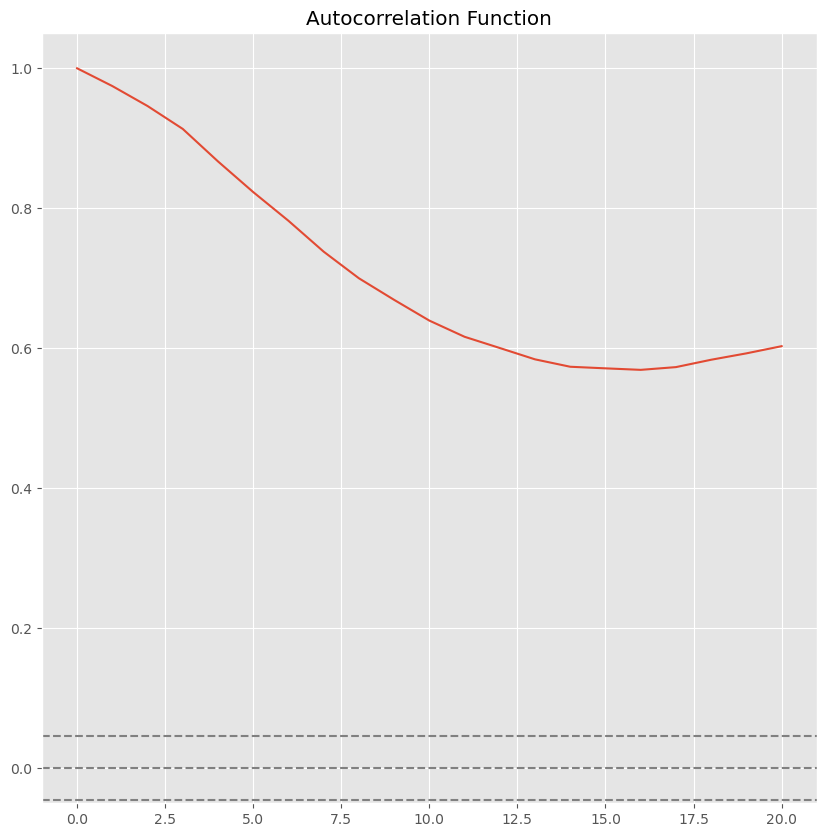

In [60]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts, nlags=20)
lag_pacf = pacf(ts, nlags=20, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')



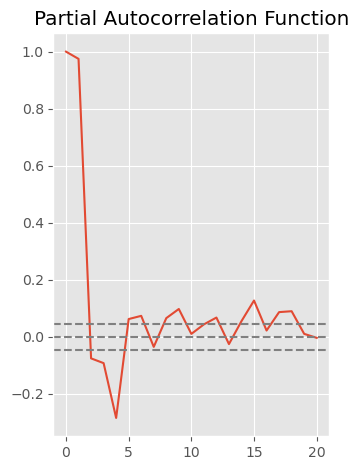

In [62]:
# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [64]:
lag_acf

array([1.        , 0.97462076, 0.94609387, 0.91335353, 0.86695681,
       0.82314743, 0.78215752, 0.73802881, 0.7000213 , 0.66918015,
       0.63954416, 0.61642146, 0.60037233, 0.58418387, 0.5736055 ,
       0.57133177, 0.56917411, 0.57309403, 0.58362857, 0.59273731,
       0.60299876])

Text(0.5, 1.0, 'Autocorrelation Function')

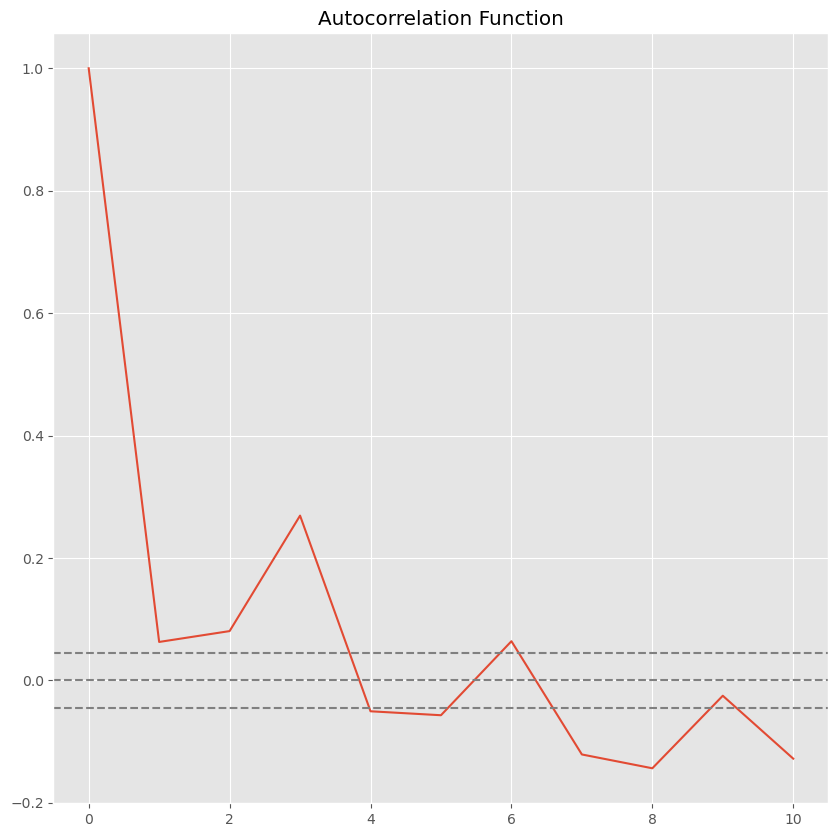

In [66]:
# ACF and PACF 
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_diff, nlags=10)
lag_pacf = pacf(ts_diff, nlags=10, method='ols')
# ACF
plt.figure(figsize=(22,10))

plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

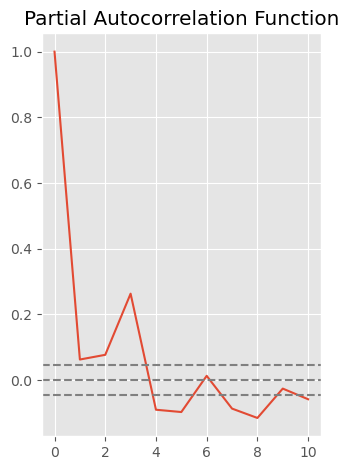

In [68]:
# PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency h will be used.

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency h will be used.

C:\Users\Dell\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency h will be used.



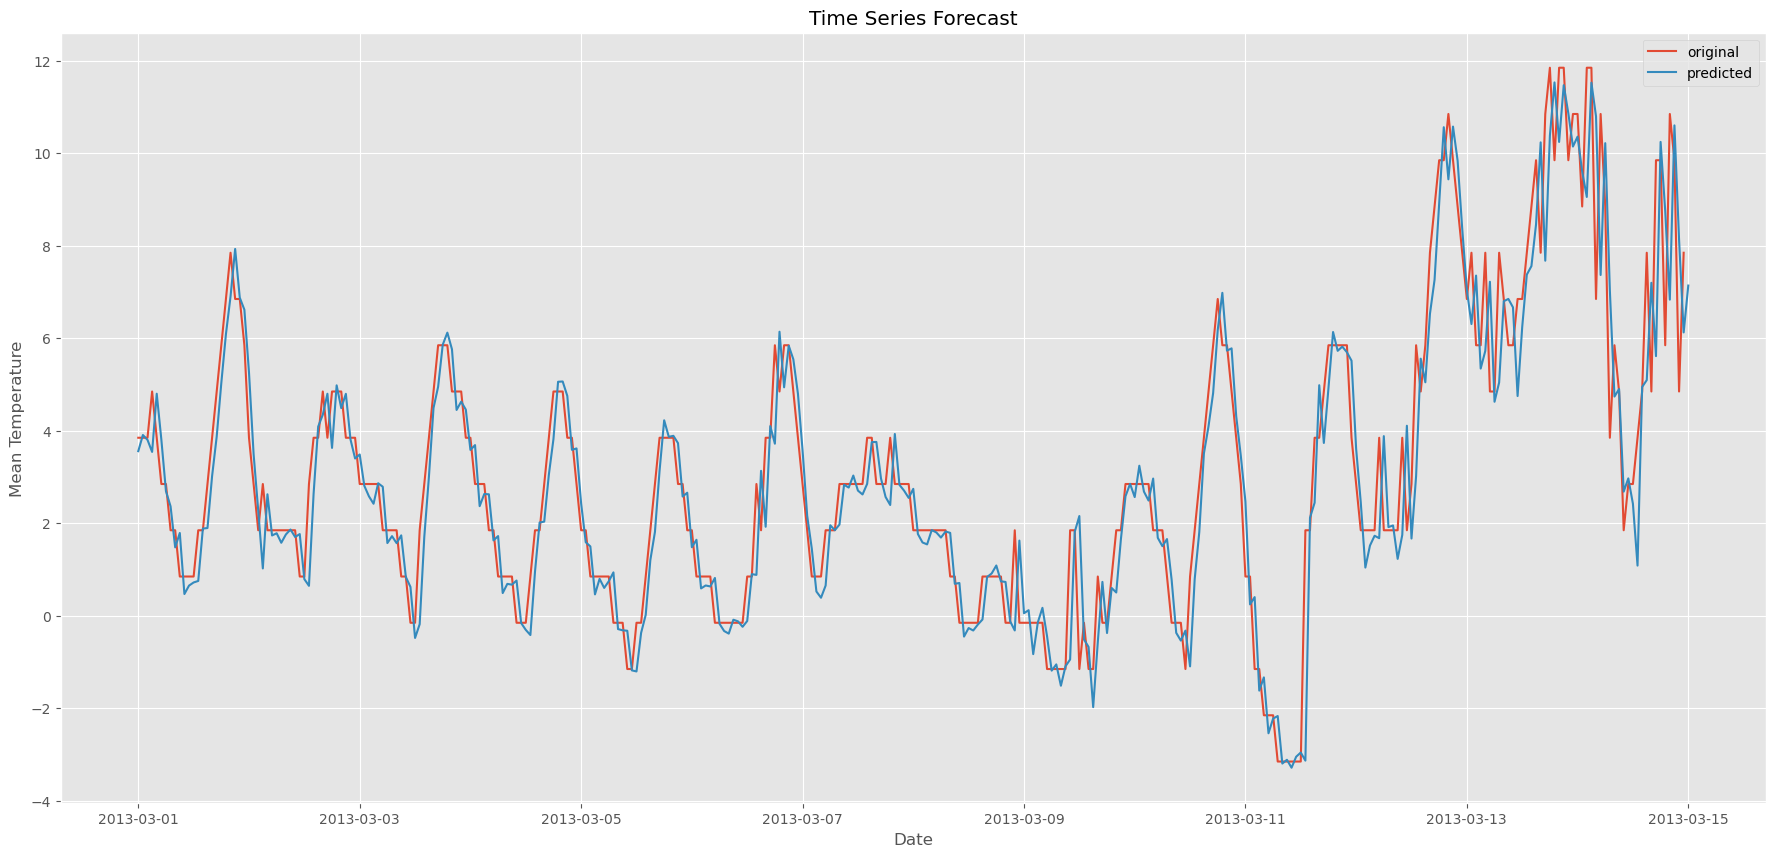

In [70]:
# ARIMA LIBRARY
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# fit model
model = ARIMA(ts, order=(4, 0, 4))  # (ARMA) = (1, 0, 1)
model_fit = model.fit()

# predict
start_index = pd.to_datetime('2013-03-01')
end_index = pd.to_datetime('2013-03-15')
forecast = model_fit.predict(start=start_index, end=end_index, dynamic=False)

# visualization
plt.figure(figsize=(22, 10))
plt.plot(bostonsample.time[59*24:73*24], bostonsample.temp[59*24:73*24], label="original")
plt.plot(forecast, label="predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()

In [72]:
train

,temp
time,
2013-01-01 00:00:00,-4.15
2013-01-01 01:00:00,-4.15
2013-01-01 02:00:00,-5.15
2013-01-01 03:00:00,-6.15
2013-01-01 04:00:00,-6.15
...,...
2013-03-18 19:00:00,0.85
2013-03-18 20:00:00,2.85
2013-03-18 21:00:00,2.85


In [74]:
bostonsample[154*24:]


,time,temp


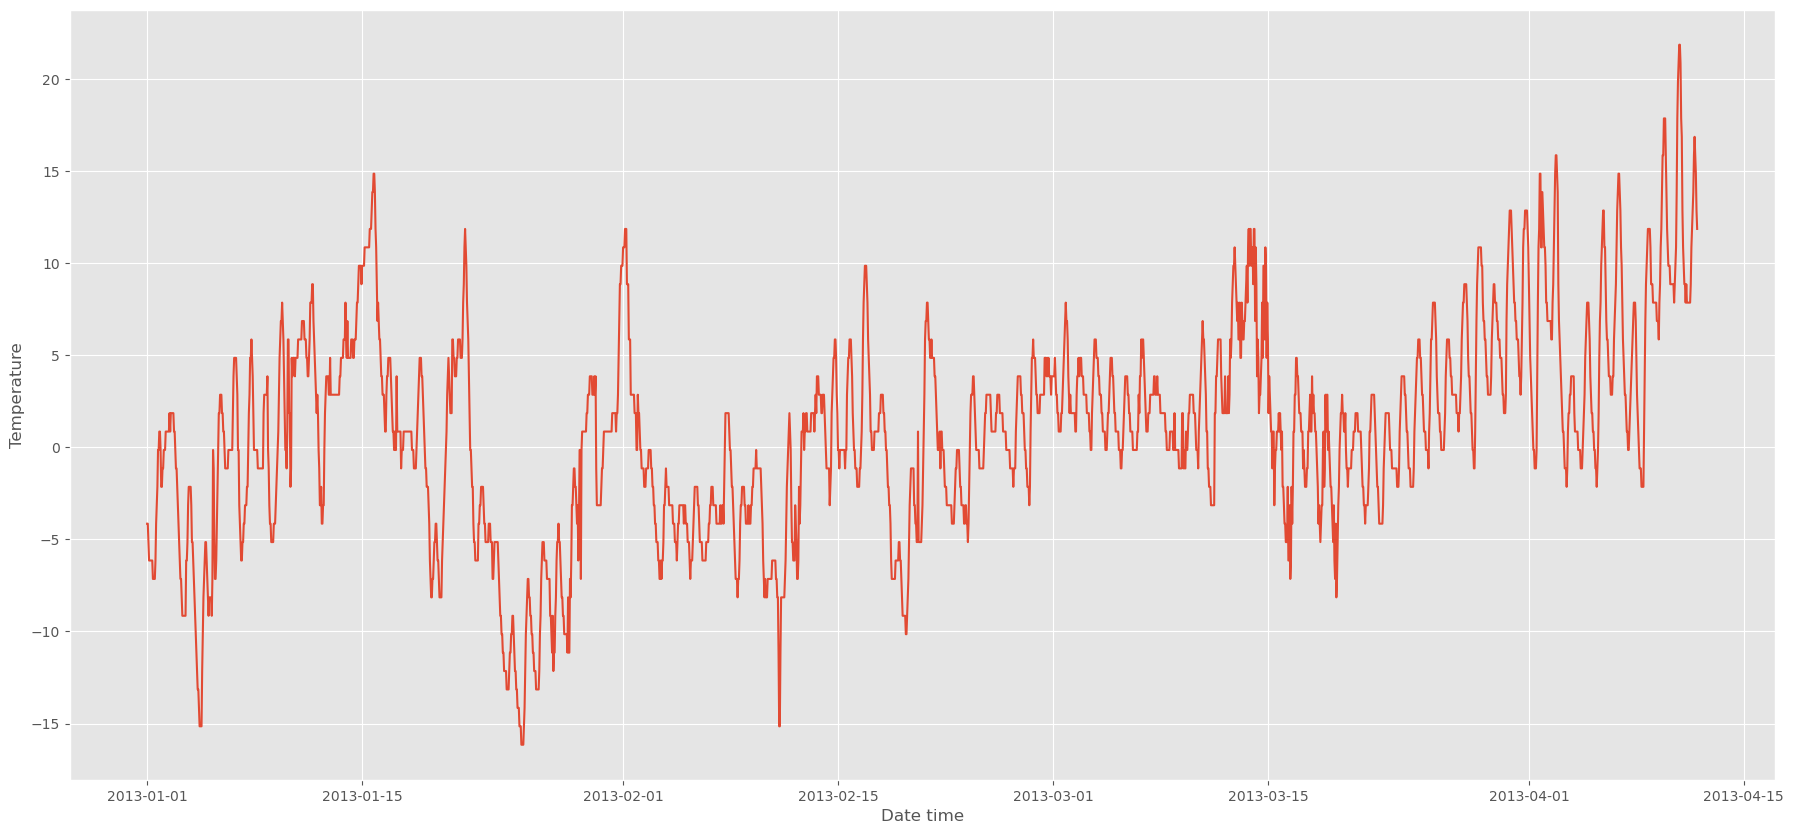

In [76]:
plt.figure(figsize=(22,10))
plt.plot(bostonsample.time,bostonsample.temp)
#plt.title("Temperature ")
plt.xlabel("Date time")
plt.ylabel("Temperature")
plt.show()